# tensornetworkの使い方

今回のゼミではgoogleのtensornetworkというライブラリを使用します。  
その名の通り、テンソルネットワークの計算を行うためのライブラリで、ネットワークを定義することで、自動で縮約の計算などを行なってくれます。  
まずはこのライブラリの使い方について解説します。

（参考）  
tensornetworkの公式ドキュメント：  
https://tensornetwork.readthedocs.io/en/latest/index.html

まずはライブラリのインストールをします。

In [ ]:
%pip install tensornetwork

In [ ]:
import tensornetwork as tn

## ノードとエッジの定義

テンソルネットワークは大きく分けてノードとエッジの二つの要素から構成されます。

- ノード：テンソル（行列）で表現される。量子回路の場合、各ゲートに相当
- エッジ：ノード間をつなぐもの。各テンソルのどの軸と接続するかを指定する。量子回路の場合、各ゲートの入出力に相当

まずは非常に簡単な2量子ビット回路である、ベル状態を生成する回路を作成し、00が出現する確率を確認します。

これを実現するテンソルネットワークを図示すると、以下のような形になります。

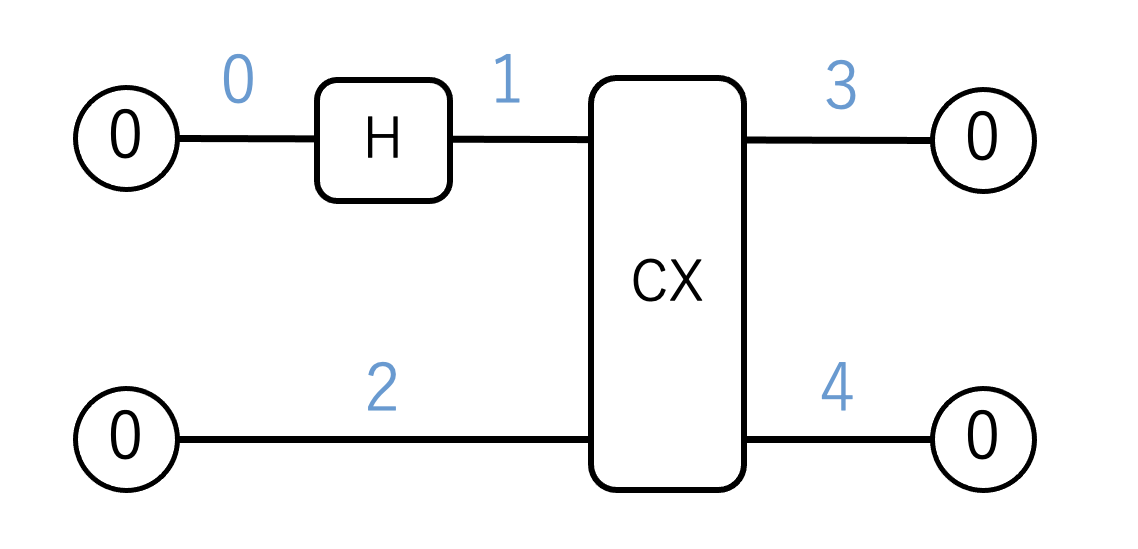

6個のノードと、それらをつなぐ5つのエッジからなるテンソルネットワークができます。  
エッジの添字は、わかりやすさのために記載しているものです。

次に、これをtensornetwork上で実装します。

### ノードの定義

まずは、各ノードを定義するため、各ゲートの行列表現を用意しておきます。

In [ ]:
import numpy as np

h_gate = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

cx_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

次に、tensornetworkのNodeクラスを用いて、ノードを定義していきます。

In [ ]:
# 初期状態に相当するノードを格納するリストを作成
initial_state_nodes = []

for _ in range(2):
    initial_state_nodes.append(tn.Node(np.array([1, 0])))  # 0状態 = [1, 0]を入力

In [ ]:
# 各ゲートに相当するノードを格納するリストを作成
gate_nodes = []

gate_nodes.append(tn.Node(h_gate)) # アダマールゲート
gate_nodes.append(tn.Node(cx_gate.reshape(2, 2, 2, 2)))  # CNOTゲート、足の数に合わせてreshapeする

In [ ]:
# 最終状態に相当するノードを格納するリストを作成
final_state_nodes = []

for _ in range(2):
    final_state_nodes.append(tn.Node(np.array([1, 0])))  # 0状態 = [1, 0]を入力

### エッジの定義

次に各ノード間をつなぐエッジを定義していきます。

tn.connect(繋ぎたいノードの足, 繋ぎたいノードの足) という記述で定義します。

足の番号の順番は左上を0として、左上、左下、右上、右下の順番に振られていきます（下図参照）

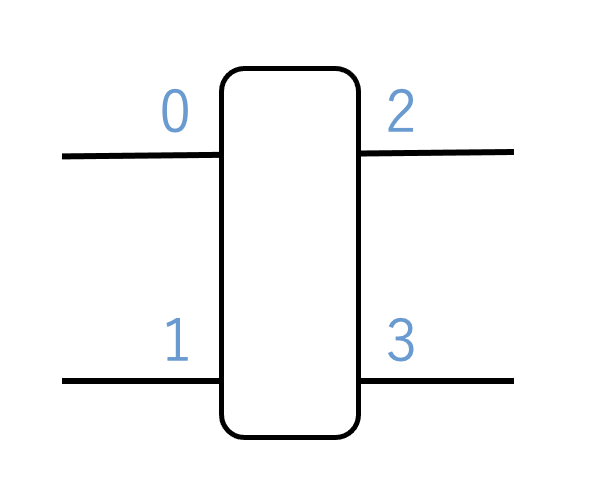

In [ ]:
# 0 : 1量子ビット目の初期状態から、Hゲートの入力
tn.connect(initial_state_nodes[0][0], gate_nodes[0][0])

# 1 : Hゲートの出力から、CXゲートの入力の1量子ビット目
tn.connect(gate_nodes[0][1], gate_nodes[1][0])

# 2 : 2量子ビット目の初期状態から、CXゲートの入力の2量子ビット目
tn.connect(initial_state_nodes[1][0], gate_nodes[1][1])

# 3 : CXゲートの出力の1量子ビット目から、1量子ビット目の最終状態
tn.connect(gate_nodes[1][2], final_state_nodes[0][0])

# 4 : CXゲートの出力の2量子ビット目から、2量子ビット目の最終状態
tn.connect(gate_nodes[1][3], final_state_nodes[1][0])

### 縮約を取る

最後に構成されたテンソルネットワークの縮約をとります。

tn.contractorクラスを利用します。入力には、すべてのノードを含むリストが必要なので、リストを結合したものを用意して、入力します。

In [ ]:
all_nodes = initial_state_nodes + gate_nodes + final_state_nodes

result = tn.contractors.auto(nodes=all_nodes)

得られた結果を取り出すと、求めたい状態の振幅が得られます。

In [ ]:
result.tensor

これを二乗することで、求めたかった確率が得られます

In [ ]:
result.tensor**2

---

# 課題１

ベル状態を求める回路から、テンソルネットワークシミュレーションを用いて、状態11の確率と、状態01の確率を求めてみましょう。

## 状態11の確率

## 状態01の確率

---

# 課題2

GHZ状態（3量子ビットのもつれ状態）を求める回路を作成し、テンソルネットワークシミュレーションを用いて、正しくシミュレーションできることを確認しましょう。

（参考）GHZ状態を作成する回路

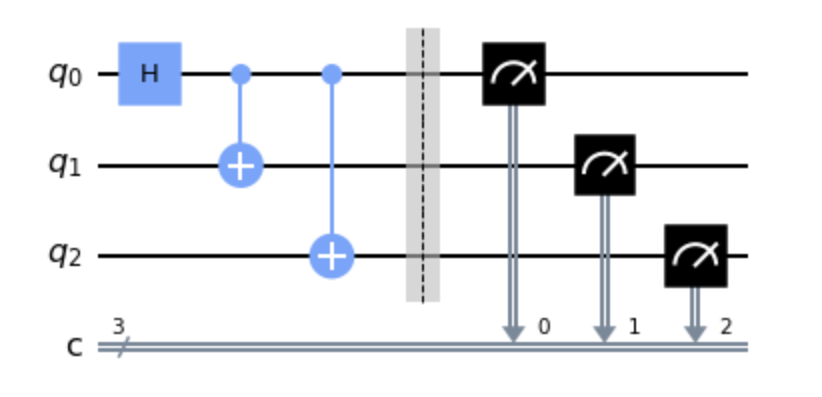

---
# 課題3
より一般に、for文などを用いて、$n$量子ビットのもつれ状態を求める回路を作成し、正しくシミュレーションできることを確認しましょう。

また、量子ビット数が非常に多くなっても高速にシミュレーションできることを確認しましょう。

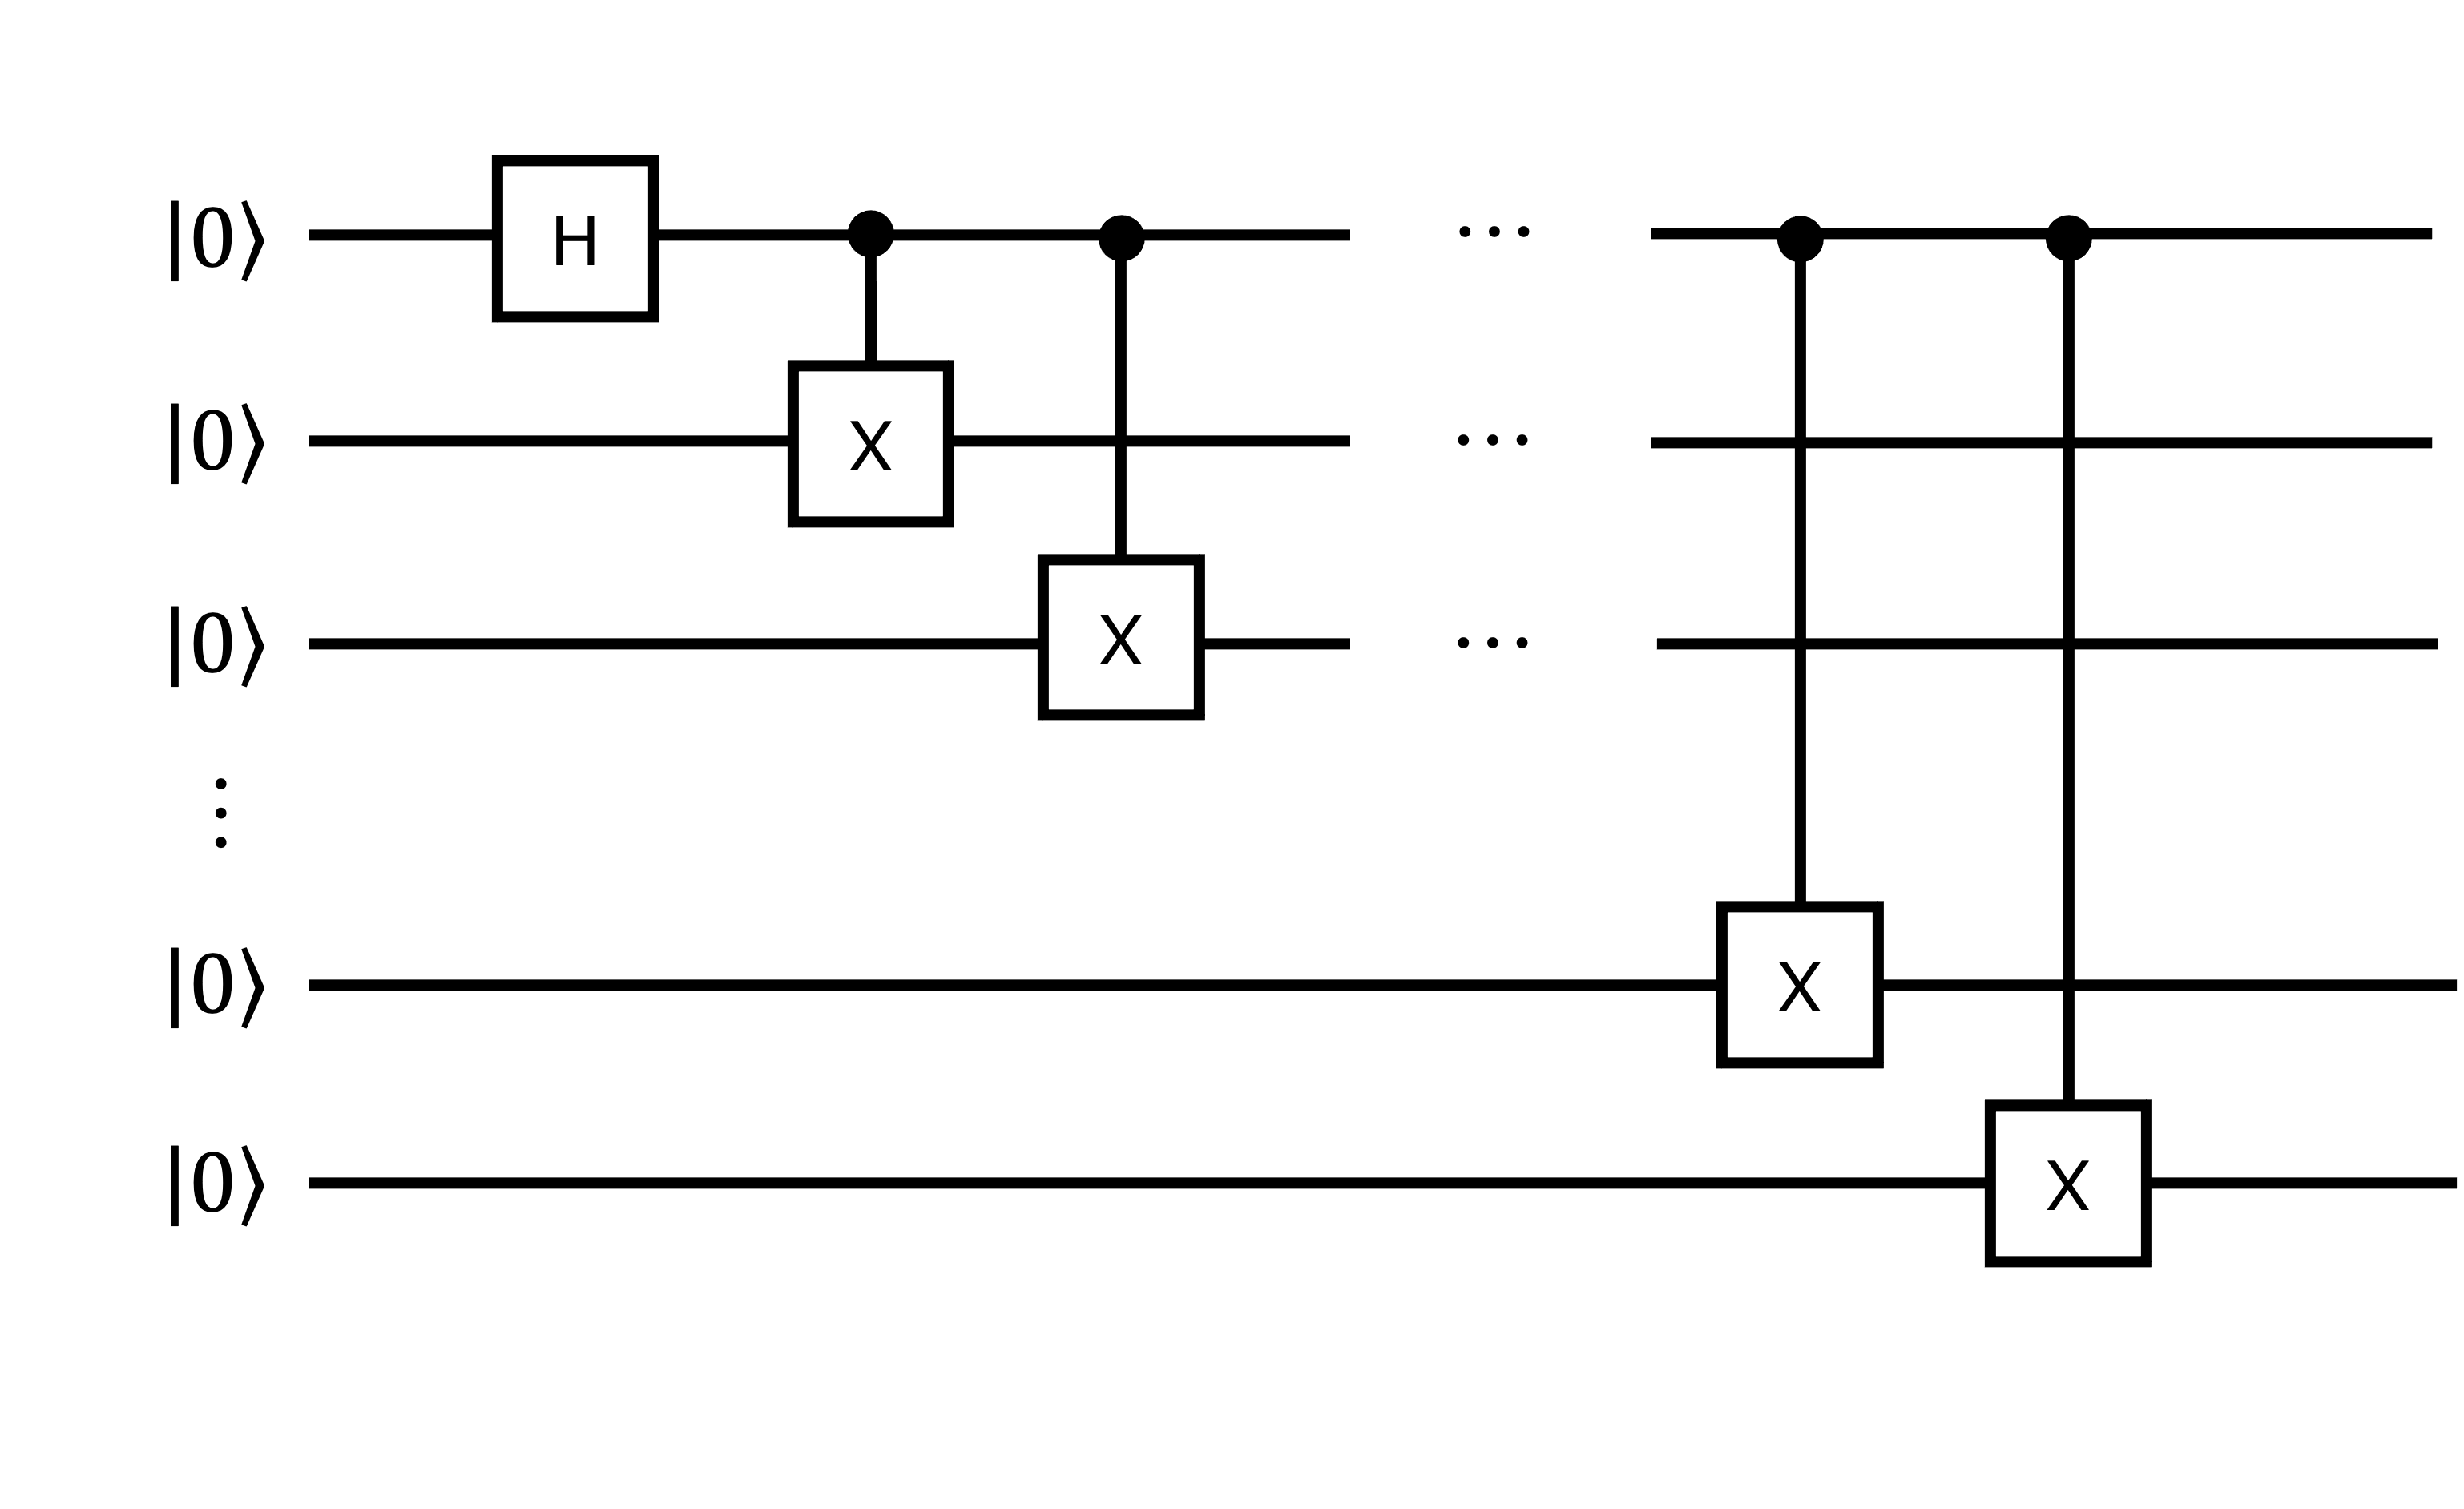

In [ ]:
n_qubits = 100

### ノードの定義

In [ ]:
# 初期状態に相当するノードを格納するリストを作成
initial_state_nodes = []

for _ in range(n_qubits):
    initial_state_nodes.append(tn.Node(np.array([1, 0])))  # 0状態 = [1, 0]を入力

In [ ]:
# 以下を自力で作成

### エッジの定義

In [ ]:
# 以下を自力で作成

### 縮約を取る

In [ ]:
all_nodes = initial_state_nodes + gate_nodes + final_state_nodes

result = tn.contractors.auto(nodes=all_nodes)

In [ ]:
print(f"振幅：{result.tensor}")
print(f"確率：{result.tensor**2}")